<b><font size="6">Face Detetcion and Recognition</font><br></b>

<font size="4">Introduction:</font>
<br>
<br>
<p><font size="3">A facial recognition system is a technology capable of matching a human face from a digital image or a video frame against a database of faces. Face recognition systems have been widely used in recent times on smartphones and in other forms of technology, such as robotics and identity verification.</font></p>
<p><font size="3">The theory behind facial recognition is the ability of distinguishing landmarks or nodal points on faces. Each human face has 80 nodal points. Facial recognition software will analyze the nodal points such as the distance between your eyes or the shape of your cheekbones. The analysis of face is then turned into a mathematical formula. This numerical code is called a faceprint. Similar to the unique structure of a thumbprint, each person has their own faceprint. The faceprint is then compared against a database of other faceprints which has photos with identification that can be compared.</font></p>

<font size="4">Overview:</font>
<br>
<br>
<p><font size="3">In this project, we are going to develope a face recognition system which will be able to detect and recognize face of famous persons. The trained model will be tested on unseen images to evaluate accuracy metrics. In the last part, we are going to examine which classifier has in terms of accuarcy.</font></p>
<p><font size="3">Images were downloaded from the following source: <a href="http://vis-www.cs.umass.edu/lfw">Click here</a></font></p>
<p><font size="3">The downloaded folder contains images of 5749 different persons each stored in a folder. Most of the folders contain only 1 image which is not suitable to train a robust and highly accurate face recognizer. For this reason I manually selected 24 folders (persons) which have at least 5 pictures. After the filtering process, I have 199 images in total (both training and testing images) from 20 different persons. This way, we'll work with 179 images in the training phase and do testing on 20 different faces of famous persons.</font></p>
<p><font size="3">After learning about the process, let's get started.</font></p>

In [1]:
# import all necessary libraries we will work with
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

<p><font size="3">First of all, let's read in and inspect a couple of images.</font></p>

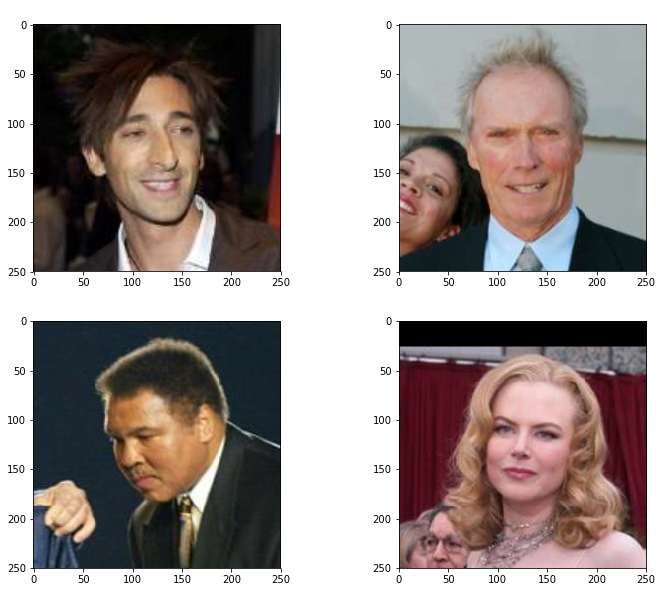

In [2]:
# Read in images and convert them into RGB format from BGR (OpenCV's original format is BGR)

name_list = ['Adrien_Brody', 'Clint_Eastwood', 'Muhammad_Ali', 'Nicole_Kidman']
plt.figure(figsize=(12,10))

for index, name in enumerate(name_list):
    
    # read in an image with OpenCV
    image = cv2.imread('Face_recognition/Train_images/' + name + '/' + name + '_0001.jpg', 1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert it to RGB
    
    #plot images
    plt.subplot(221+index)
    plt.imshow(image)
    plt.title(name, size=14, color='white')

In [3]:
# every image has the same size of 250 by 250 with 3 channels
print('Shape of images:', image.shape)

Shape of images: (250, 250, 3)


<font size="3">As we can see, frontal face images are croped, cut and center aligned in order to improve face recognition accuracy and avoid the algorithm to wrongly recognize and classify other faces (from the background) which are out of interest. Although, there might be cases, when faces do not directly look into the camera or faces are covered by sunglasses, caps which make the algorithm difficult to identify faces.</font>

<p><font size="4">Face Detection</font></p>
<br>
<br>
<font size="3">Here in this section, we will deal with face detection. For detection, I will use one of OpenCV's pre-trained classifiers (an XML file) used for face detection. First, we need to load the required XML classifier, then load our input image.</font><br>
<font size="3">OpenCV has several buil-in classifiers for face classification, for frontal face detection I'll start with a haarcascade_frontalface_default.xml classifier. Later on we'll play around and test another classifier to compare its performance.</font><br>

In [4]:
# let's load the classifier
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

In [5]:
# Now let us create some funcions we will work with

# This method's aim is to detect faces only. In the next step, we are going to find out how 
# many faces can be detected out of all images.
def detect_face(image):
    
    # Detect faces with a Frontal Face Cascade Classifier
    face_rects = face_cascade.detectMultiScale(image, scaleFactor=1.2, minNeighbors=5)
    # I did experiment with these parameters and found out that these paramters gave the best
    # results/highest detection rate.
    
    # check if face is detected or not
    if face_rects == ():
        return False
    else:
        return True

# This funcion detects faces and draw rectangles on it for observing purposes.
def detect_face_and_draw_rectangle(image):
    
    # Detect faces with a Frontal Face Cascade Classifier
    face_rects = face_cascade.detectMultiScale(image, scaleFactor=1.2, minNeighbors=5) 
    # I did experiment with these parameters and found out that these paramters gave the best
    # results/highest detection rate.
    
    # check if face is detected or not
    if face_rects == ():
        return image, False
    
    # Draw rectangle on detected face
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 2)
    return image, True


Face detected: True


Text(0.5,1,'Clint_Eastwood')

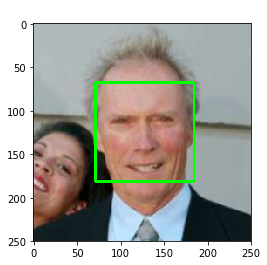

In [6]:
# Let's have a look an example how it works on face of Clint Eastwood

Clint_Eastwood = cv2.imread('Face_recognition/Train_images/Clint_Eastwood/Clint_Eastwood_0001.jpg', 1)
Clint_Eastwood = cv2.cvtColor(Clint_Eastwood, cv2.COLOR_BGR2RGB)
# Run the method and plot the image
image, detected = detect_face_and_draw_rectangle(Clint_Eastwood)

print('Face detected:', detected)
plt.imshow(image)
plt.title('Clint_Eastwood', size=14, color='white')

<font size="3">Now we are going to examine how faces are detected. And then we will select the best performing classifier for the face recognition section.</font>

In [7]:
# Loop over every images we have stored in folders and check how many faces are detected
counter = 0
detected_images = 0
train_image_dir = 'Face_recognition/Train_images'
# let's load the classifier
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

for root, dirs, files in os.walk(train_image_dir):
    for file in files:
        counter += 1 # count how many images we have in total
        path = os.path.join(root, file)
        image = cv2.imread(path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # convert to grayscale to feed them into
        # the cascade classifier

        detected = detect_face(gray)
        
        if detected is True:
            detected_images += 1

print('Total number of detected faces:', detected_images)
print('Face detetcion ratio:', round(detected_images/counter, 4))

Total number of detected faces: 226
Face detetcion ratio: 0.9224


In [8]:
# Let's experiment with other classifiers (haarcascade_frontalface_alt.xml and 
# haarcascade_frontalface_alt2.xml)

train_image_dir = 'Face_recognition/Train_images'
classifiers = ['haarcascades/haarcascade_frontalface_alt.xml', 
               'haarcascades/haarcascade_frontalface_alt2.xml']
for classifier in classifiers:
    face_cascade = cv2.CascadeClassifier(classifier) 

    counter = 0
    detected_images = 0

    for root, dirs, files in os.walk(train_image_dir):
        for file in files:
            counter += 1 # count how many images we have in total
            path = os.path.join(root, file)
            image = cv2.imread(path)
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            detected = detect_face(gray)

            if detected is True:
                detected_images += 1

    print('Total number of detected faces with ' + classifier + ':', detected_images)
    print('Face detetcion ratio with ' + classifier + ':', round(detected_images/counter, 4))
    print('-----------')

Total number of detected faces with haarcascades/haarcascade_frontalface_alt.xml: 213
Face detetcion ratio with haarcascades/haarcascade_frontalface_alt.xml: 0.8694
-----------
Total number of detected faces with haarcascades/haarcascade_frontalface_alt2.xml: 215
Face detetcion ratio with haarcascades/haarcascade_frontalface_alt2.xml: 0.8776
-----------


<font size="3">The haarcascade_frontalface_alt.xml and haarcascade_frontalface_alt2.xml classifiers could detect only 172 and 176 faces respectively. Therefore, we are going to use our haarcascade_frontalface_default.xml file which could detect more (186) faces.</font>

<p><font size="4">Build a Face Recognition Model (default)</font></p>
<br>
<br>
<font size="3">In this part, we are going to create a Face Recognition model using haarcascade_frontalface_default.xml classifier and test it on unseen images to evaluate accuracy.</font>

In [11]:
current_id = 0
label_ids = {}
y_labels = []
x_train = []

# Here we use our haarcascade_frontalface_default classifier
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
recognizer = cv2.face.LBPHFaceRecognizer_create() # create a recognizer object

train_image_dir = 'Face_recognition/Train_images'

# loop over every images
for (root,dirs,files) in os.walk(train_image_dir):
    for file in files:
        path = os.path.join(root, file)
        label = os.path.basename(root).replace('_', ' ') # get labels
        if not label in label_ids: # create a dictionary of label ids
            label_ids[label] = current_id
            current_id += 1
        id_ = label_ids[label]
        
        pil_image = Image.open(path).convert('L') # open images an convert them into grayscale
        image_array = np.array(pil_image, 'uint8')
        # detect faces
        faces = face_cascade.detectMultiScale(image_array, scaleFactor=1.2, minNeighbors=5)
        
        # get Region Of Interest (detected faces)
        for x, y, w, h in faces:
            roi = image_array[y:y+h, x:x+w]
            x_train.append(roi)
            y_labels.append(id_)

# finally we can train our face recognizing model, then save it to a YML file (if necessary)
recognizer.train(x_train, np.array(y_labels))
# recognizer.save('trainer_default.yml')

In [12]:
print('Dictionary of label ids:\n', label_ids)

Dictionary of label ids:
 {'Adrien Brody': 0, 'Al Gore': 1, 'Andy Roddick': 2, 'Clint Eastwood': 3, 'Colin Montgomerie': 4, 'Denzel Washington': 5, 'George W Bush': 6, 'Jacques Chirac': 7, 'Jan Ullrich': 8, 'Jimmy Carter': 9, 'John Allen Muhammad': 10, 'John Bolton': 11, 'John Snow': 12, 'Lance Armstrong': 13, 'Martin Scorsese': 14, 'Muhammad Ali': 15, 'Nicole Kidman': 16, 'Norah Jones': 17, 'Paul Wolfowitz': 18, 'Princess Caroline': 19, 'Prince Charles': 20, 'Ralf Schumacher': 21, 'Renee Zellweger': 22, 'Zinedine Zidane': 23}


<font size="3">Now, we'll loop over all of our test images stored in 'Test_images' directory. We will use our previously trained recognizer's predict method to identify faces.</font>

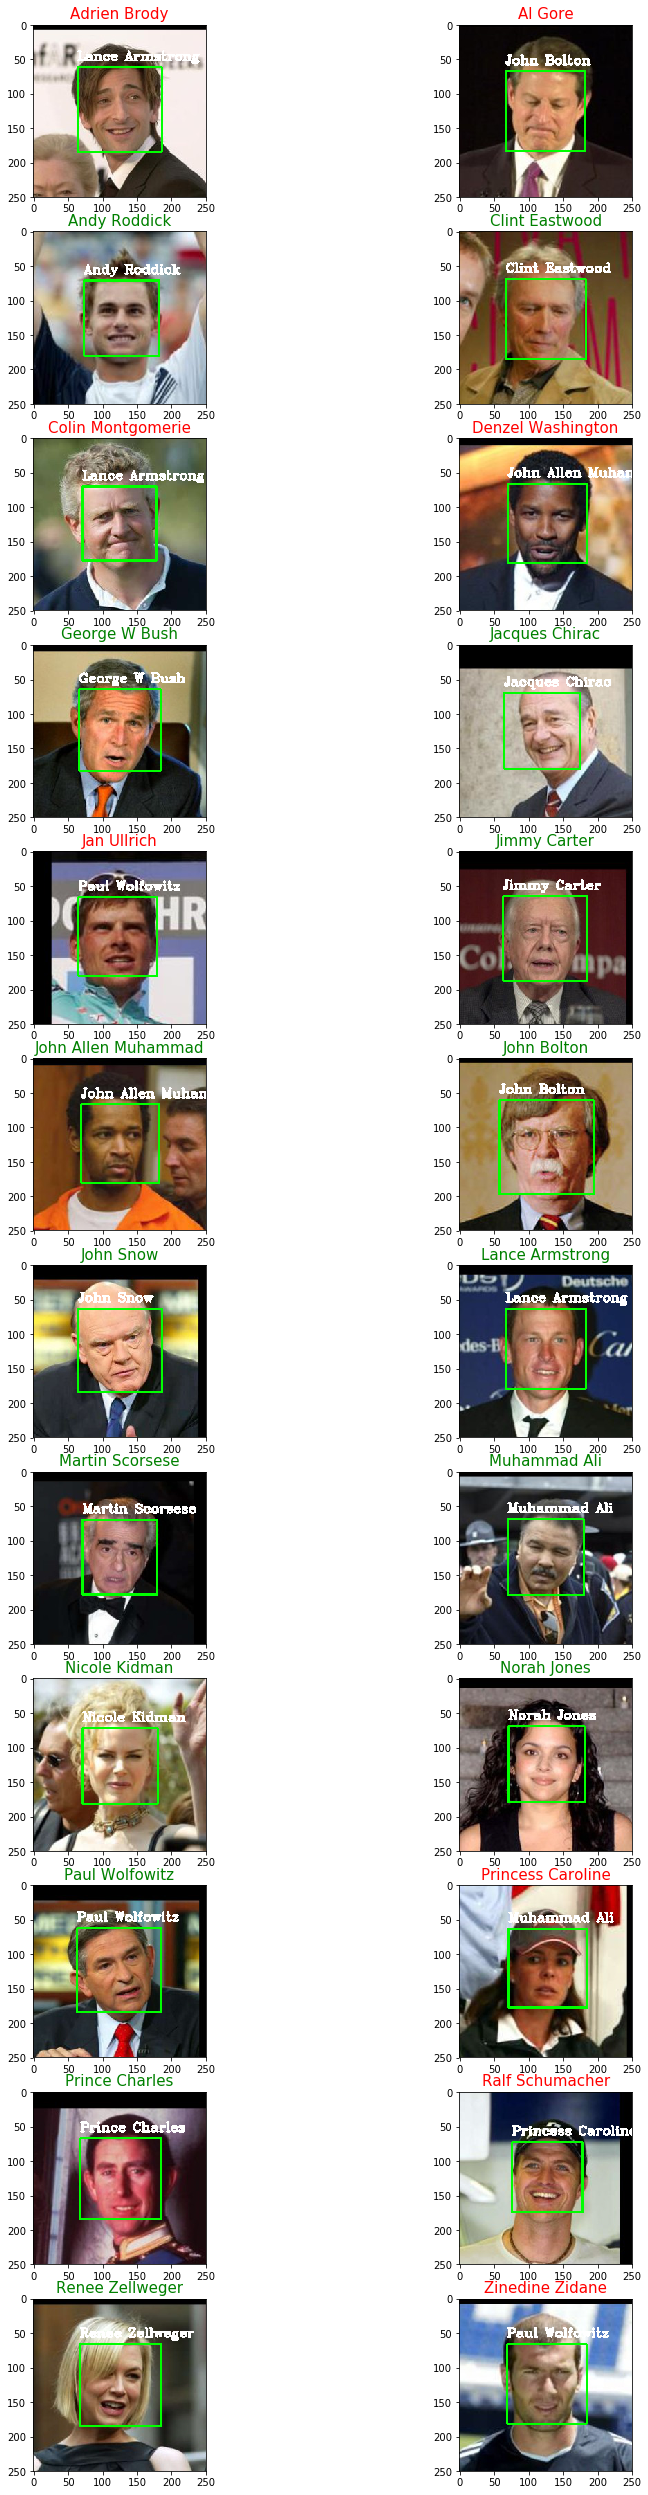

In [13]:
# Recognize faces on test images

correct_preds = 0
predictions = {}
pred_names = []
real_names = []
labels = {v:k for k,v in label_ids.items()}

# make a Recognized_faces folder to save recognized images
recognized_images_path = 'Face_recognition/Recognized_faces'
if os.path.isdir(recognized_images_path) == False:
    os.mkdir(recognized_images_path)

test_images_dir = 'Face_recognition/Test_images'
plt.figure(figsize=(14,45)) # create a figure for plotting all 20 test images

for index, image in enumerate(os.listdir(test_images_dir)):
    
    real_name = str(image).split('.')[0].replace('_', ' ')[:-5] # get real names from folder
    real_names.append(real_name)
    test_image = cv2.imread(os.path.join(test_images_dir, image), 1)
    gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
    # faces are detected here
    face = face_cascade.detectMultiScale(gray, scaleFactor=1.25, minNeighbors=5)
    
    #draw rectangles and put text on identyfied test images
    for x, y, w, h in face:
        
            roi_gray = gray[y:y+h, x:x+w]
            id_, _ = recognizer.predict(roi_gray)
            font = cv2.FONT_HERSHEY_COMPLEX
            pred_name = labels[id_]
            pred_names.append(pred_name)
            
            cv2.putText(test_image, text=pred_name, org=(x,y-10), fontFace=font,
                        fontScale=0.6, color=(255,255,255), thickness=2)
            
            cv2.rectangle(test_image, (x,y), (x+w,y+h), (0,255,0), 2)
    
    # correctly predicted names highlighted with green, uncorrect ones with red
    if real_name == pred_name:
        correct_preds += 1
        predictions[real_name] = 1
        color = 'green'
    else:
        predictions[real_name] = 0
        color = 'red'
    
    # save recognized images
    img = real_name + ' recognized_default.jpg'
    cv2.imwrite(os.path.join(recognized_images_path, img), test_image)
    
     # convert back to RGB
    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    plt.subplot(np.ceil(len(os.listdir(test_images_dir))/2), 2, index+1)
    plt.imshow(test_image)
    plt.title(real_name, size=15, color=color)

<font size="4">Accuracy with the default frontal face classifier:</font><br>

In [14]:
# Face recognition accuarcy
test_img_total = len(os.listdir(test_images_dir))
print('Number of correct predictions:', correct_preds)
print('Accuracy:', round(correct_preds/test_img_total, 4))

Number of correct predictions: 16
Accuracy: 0.6667


<font size="3">This is a pretty good accuracy considering that we were working with a small data.</font>
<br>
<br>
<font size="3">I have an intuition that if a face is recignozed or not is strongly depends on how many images the algorithm get trained with. So let's check out how many pictures per person we have!</font>

In [16]:
# Get lenght of every folder
len_directories = {}
for directory in os.listdir(train_image_dir):
    len_directories[directory.replace('_', ' ')] = len([name for name in os.listdir(os.path.join(train_image_dir, directory))])

# Combine the len_directories and the predictions dictionaries to compare them
ds = [len_directories, predictions]
dic = {}
for k in len_directories.keys():
    dic[k] = tuple(dic[k] for dic in ds)
# The first value represents the lenght of folder, the second one the prediction value (1 for
# predicted, 0 for not)
dic

{'Adrien Brody': (11, 0),
 'Al Gore': (7, 0),
 'Andy Roddick': (14, 1),
 'Clint Eastwood': (5, 1),
 'Colin Montgomerie': (4, 0),
 'Denzel Washington': (4, 0),
 'George W Bush': (9, 1),
 'Jacques Chirac': (34, 1),
 'Jan Ullrich': (5, 0),
 'Jimmy Carter': (8, 1),
 'John Allen Muhammad': (10, 1),
 'John Bolton': (16, 1),
 'John Snow': (16, 1),
 'Lance Armstrong': (17, 1),
 'Martin Scorsese': (6, 1),
 'Muhammad Ali': (9, 1),
 'Nicole Kidman': (11, 1),
 'Norah Jones': (14, 1),
 'Paul Wolfowitz': (9, 1),
 'Princess Caroline': (4, 0),
 'Prince Charles': (4, 1),
 'Ralf Schumacher': (7, 0),
 'Renee Zellweger': (16, 1),
 'Zinedine Zidane': (5, 0)}

<font size="3">Going through the numbers, we can discover that those with more images tend to be recognized well than those who has less. So we can conclude that facial recognition system's accuracy strongly depends on the size of our database.</font>

<font size="4">Face Recognition Model (alt2)</font>
<br><br>
<font size="3">Now let's repeat the same process and see how haarcascade_frontalface_alt2.xml classifier performs!</font>

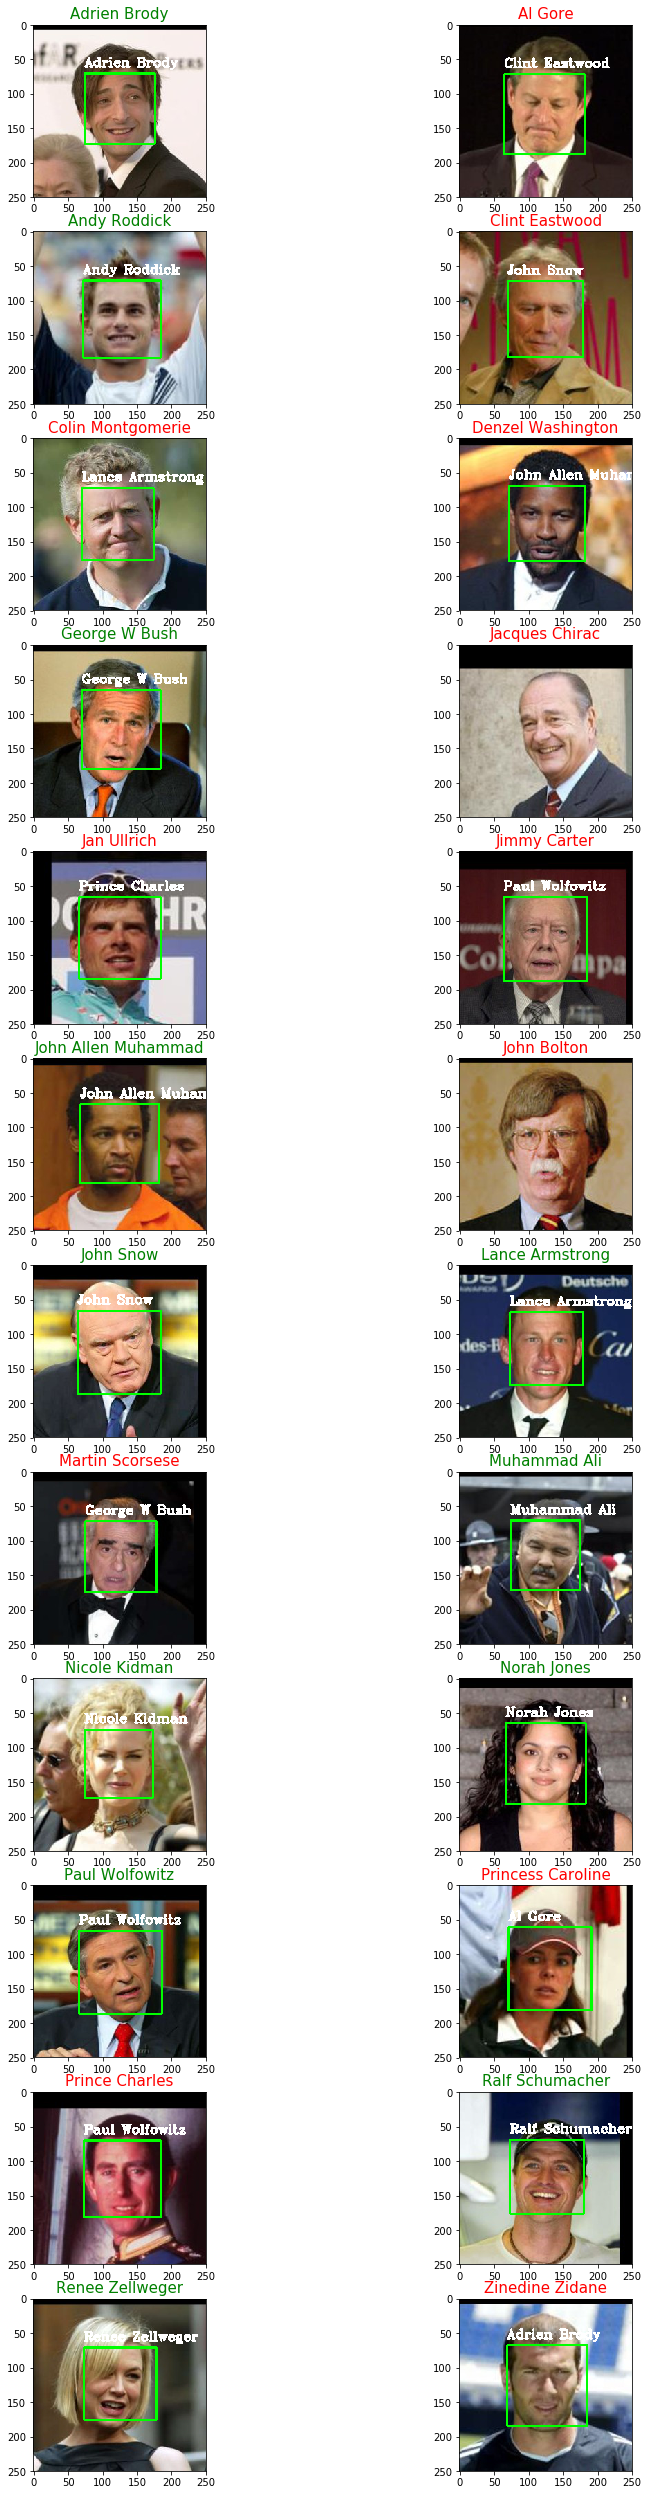

In [17]:
current_id = 0
label_ids = {}
y_labels = []
x_train = []

# Here we use our haarcascade_frontalface_alt2 classifier
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt2.xml')
recognizer = cv2.face.LBPHFaceRecognizer_create() # create a recognizer object

train_image_dir = 'Face_recognition/Train_images'

# loop over every images
for (root,dirs,files) in os.walk(train_image_dir):
    for file in files:
        path = os.path.join(root, file)
        label = os.path.basename(root).replace('_', ' ') # get labels
        if not label in label_ids: # create a dictionary of label ids
            label_ids[label] = current_id
            current_id += 1
        id_ = label_ids[label]
        
        pil_image = Image.open(path).convert('L') # open images an convert them into grayscale
        image_array = np.array(pil_image, 'uint8')
        # detect faces
        faces = face_cascade.detectMultiScale(image_array, scaleFactor=1.2, minNeighbors=5)
        
        # get Region Of Interest (detected faces)
        for x, y, w, h in faces:
            roi = image_array[y:y+h, x:x+w]
            x_train.append(roi)
            y_labels.append(id_)

# finally we can train our face recognizing model, then save it to a YML file (if necessary)
recognizer.train(x_train, np.array(y_labels))
# recognizer.save('trainer_alt2.yml')

# Recognize faces on test images

correct_preds = 0
predictions = {}
pred_names = []
real_names = []
labels = {v:k for k,v in label_ids.items()}

# make a Recognized_faces folder to save recognized images
recognized_images_path = 'Face_recognition/Recognized_faces'
if os.path.isdir(recognized_images_path) == False:
    os.mkdir(recognized_images_path)

test_images_dir = 'Face_recognition/Test_images'
plt.figure(figsize=(14,45)) # create a figure for plotting all 20 test images

for index, image in enumerate(os.listdir(test_images_dir)):
    
    real_name = str(image).split('.')[0].replace('_', ' ')[:-5] # get real names from folder
    real_names.append(real_name)
    test_image = cv2.imread(os.path.join(test_images_dir, image), 1)
    gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
    # faces are detected here
    face = face_cascade.detectMultiScale(gray, scaleFactor=1.25, minNeighbors=5)
    
    #draw rectangles and put text on identyfied test images
    for x, y, w, h in face:
        
            roi_gray = gray[y:y+h, x:x+w]
            id_, _ = recognizer.predict(roi_gray)
            font = cv2.FONT_HERSHEY_COMPLEX
            pred_name = labels[id_]
            pred_names.append(pred_name)
            
            cv2.putText(test_image, text=pred_name, org=(x,y-10), fontFace=font,
                        fontScale=0.6, color=(255,255,255), thickness=2)
            
            cv2.rectangle(test_image, (x,y), (x+w,y+h), (0,255,0), 2)
    
    # correctly predicted names highlighted with green, uncorrect ones with red
    if real_name == pred_name:
        correct_preds += 1
        predictions[real_name] = 1
        color = 'green'
    else:
        predictions[real_name] = 0
        color = 'red'
    
    # save recognized images
    img = real_name + ' recognized_alt2.jpg'
    cv2.imwrite(os.path.join(recognized_images_path, img), test_image)
    
     # convert back to RGB
    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    plt.subplot(np.ceil(len(os.listdir(test_images_dir))/2), 2, index+1)
    plt.imshow(test_image)
    plt.title(real_name, size=15, color=color)

<font size="4">Accuracy with the alt2 frontal face classifier:</font><br>

In [18]:
# Face recognition accuarcy
test_img_total = len(os.listdir(test_images_dir))
print('Number of correct predictions:', correct_preds)
print('Accuracy:', round(correct_preds/test_img_total, 4))

Number of correct predictions: 12
Accuracy: 0.5


<font size="3">The face recognition sysetm with alt2 cascade classifier has reached only a 0.5 accuracy despite the default classifier's 0.667 accuracy. Face detection on testing images was not 100% successful since Jacques Chirac's and John Bolton's face remained undetected. Although, there are instances which were recognized by only the alt2 classifier and vice versa. Consequently, it is worth combining them to improve accuracy for future applications.</font>

<font size="4">Conlusion:</font>
<br>
<br>
<font size="3">We can clearly see that face recognition highly depends on how many images belong to each person. Folders, that have 5 or less images are the most likely misclassified despite those whiche have at least 9 images per folder.</font><br><br>
<font size="3">Colin Montgomerie was mislabeled since he has very similar face features like Clint Eastwood. Princess Caroline migh have been misclassified due to her baseball cap which covers her face partially making the system difficult to recognize. Our randomly selected testing images may have unique features (smiling faces, faces not looking directly into the camera, etc.) on which the model was not trained.</font><br><br>
<font size="3">All in all, in this project I managed to deploy a face regonition algorithm which was primarily able to detect faces with 92.24% efficiency. Then, I successfully recognized those faces with 66.67% accuracy with OpenCV's built-in default classifier for frontal faces.</font>